In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
csv_file_path = "log.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to confirm the data has been loaded correctly
df.head()

,Encoding,Height,Width,Trains,Result,Success,Failures,RAM_Failures,Solving Proportion,Given Horizon,Resulting Horizon
0,encodings/multiple/grid/,50,50,5,SUCCESS,111,4,0,0.050924,77,69
1,encodings/multiple/grid/,50,50,10,SUCCESS,18,2,0,0.078921,76,69
2,encodings/multiple/grid/,50,50,15,SUCCESS,12,0,0,0.078580,76,69
3,encodings/multiple/grid/,50,50,20,SUCCESS,4,1,0,0.072077,79,73
4,encodings/multiple/grid/,50,50,25,SUCCESS,3,1,0,0.156650,72,66


/tmp/ipykernel_62737/2278173991.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_50 = df[df['Encoding'] == 'encodings/multiple/grid/'][df['Height'] == 50]
/tmp/ipykernel_62737/2278173991.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_100 = df[df['Encoding'] == 'encodings/multiple/grid/'][df['Height'] == 100]


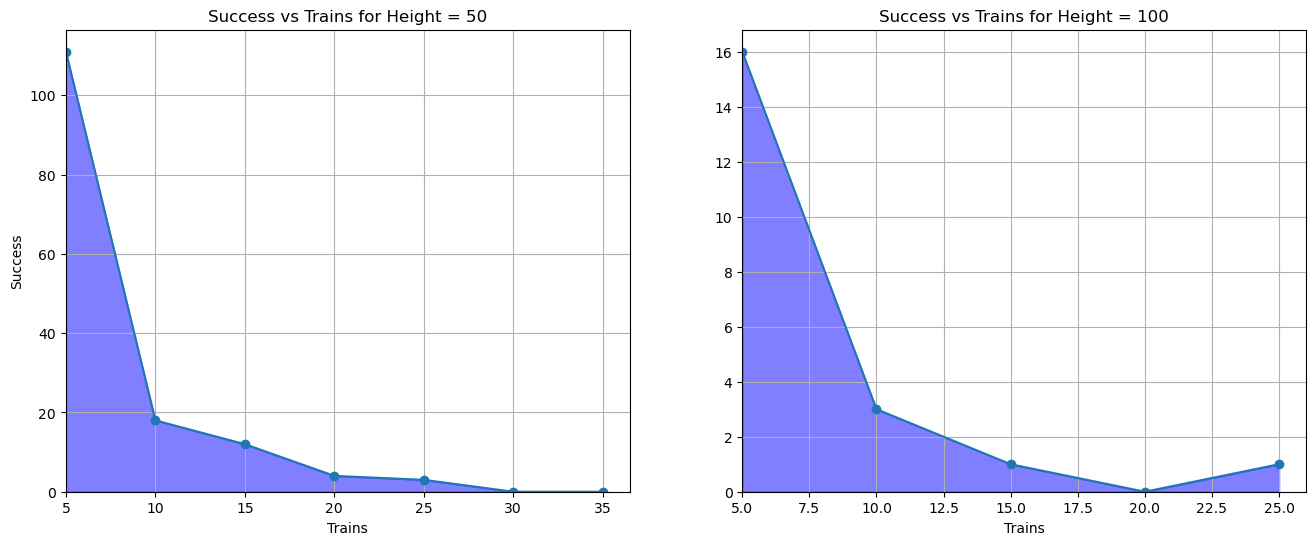

In [38]:
# Filter rows where Encoding is "/encoding/multiple/grid/" and Height is 50
filtered_df_50 = df[df['Encoding'] == 'encodings/multiple/grid/'][df['Height'] == 50]

# Filter rows where Encoding is "/encoding/multiple/grid/" and Height is 100
filtered_df_100 = df[df['Encoding'] == 'encodings/multiple/grid/'][df['Height'] == 100]

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Height = 50 on the left subplot
axs[0].plot(filtered_df_50['Trains'], filtered_df_50['Success'], marker='o')
axs[0].fill_between(filtered_df_50['Trains'], filtered_df_50['Success'], color='blue', alpha=0.5)
axs[0].set_xlim(left=5)
axs[0].set_ylim(bottom=0)
axs[0].set_xlabel('Trains')
axs[0].set_ylabel('Success')
axs[0].set_title('Success vs Trains for Height = 50')
axs[0].grid(True)

# Plot for Height = 100 on the right subplot
axs[1].plot(filtered_df_100['Trains'], filtered_df_100['Success'], marker='o')
axs[1].fill_between(filtered_df_100['Trains'], filtered_df_100['Success'], color='blue', alpha=0.5)
axs[1].set_xlim(left=5)
axs[1].set_ylim(bottom=0)
axs[1].set_xlabel('Trains')
axs[1].set_title('Success vs Trains for Height = 100')
axs[1].grid(True)

# Show the plots
plt.show()

/tmp/ipykernel_62737/197761066.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grid_df_50 = df[df['Encoding'] == 'encodings/multiple/grid/'][df['Height'] == 50]
/tmp/ipykernel_62737/197761066.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weighted_df_50 = df[df['Encoding'] == 'encodings/multiple/weighted/'][df['Height'] == 50]
/tmp/ipykernel_62737/197761066.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ordered_pipe_df_50 = df[df['Encoding'] == 'encodings/multiple/ordered_pipe/'][df['Height'] == 50]
/tmp/ipykernel_62737/197761066.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grid_df_100 = df[df['Encoding'] == 'encodings/multiple/grid/'][df['Height'] == 100]
/tmp/ipykernel_62737/197761066.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weighted_df_100 = df[df['Encoding'] == 'encodings/multiple/weighted/']

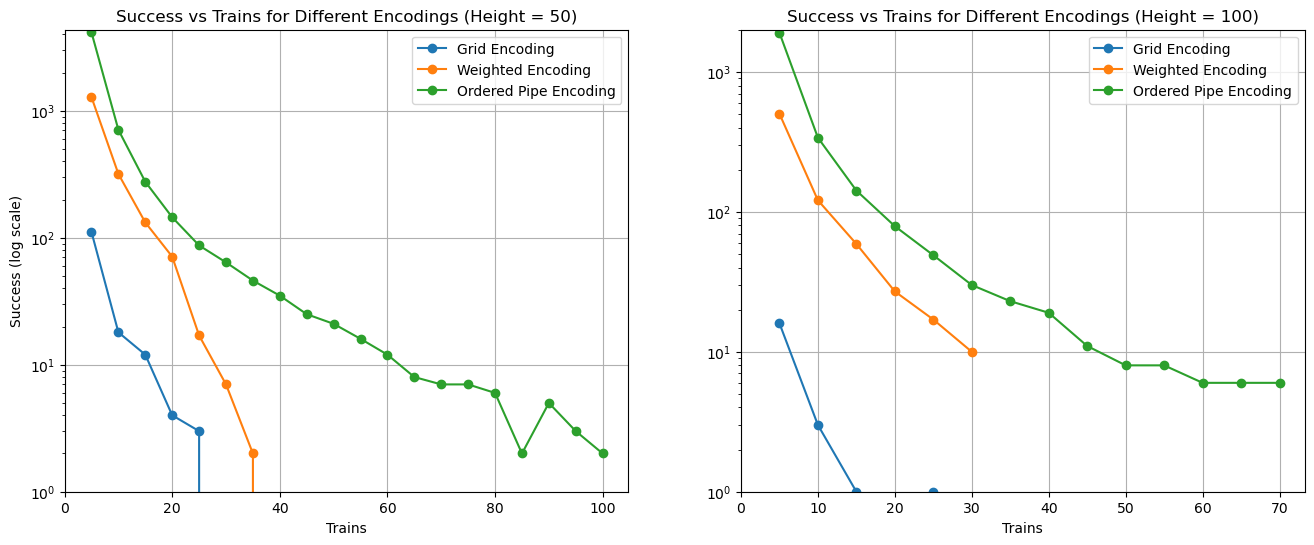

In [39]:
import matplotlib.pyplot as plt

# Filter rows for each encoding and height = 50
grid_df_50 = df[df['Encoding'] == 'encodings/multiple/grid/'][df['Height'] == 50]
weighted_df_50 = df[df['Encoding'] == 'encodings/multiple/weighted/'][df['Height'] == 50]
ordered_pipe_df_50 = df[df['Encoding'] == 'encodings/multiple/ordered_pipe/'][df['Height'] == 50]

# Filter rows for each encoding and height = 100
grid_df_100 = df[df['Encoding'] == 'encodings/multiple/grid/'][df['Height'] == 100]
weighted_df_100 = df[df['Encoding'] == 'encodings/multiple/weighted/'][df['Height'] == 100]
ordered_pipe_df_100 = df[df['Encoding'] == 'encodings/multiple/ordered_pipe/'][df['Height'] == 100]

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for height = 50 on the left subplot
axs[0].plot(grid_df_50['Trains'], grid_df_50['Success'], marker='o', label='Grid Encoding')
axs[0].plot(weighted_df_50['Trains'], weighted_df_50['Success'], marker='o', label='Weighted Encoding')
axs[0].plot(ordered_pipe_df_50['Trains'], ordered_pipe_df_50['Success'], marker='o', label='Ordered Pipe Encoding')
axs[0].set_xlim(left=0)
axs[0].set_ylim(bottom=1)
axs[0].set_yscale('log')
axs[0].set_xlabel('Trains')
axs[0].set_ylabel('Success (log scale)')
axs[0].set_title('Success vs Trains for Different Encodings (Height = 50)')
axs[0].legend()
axs[0].grid(True)

# Plot for height = 100 on the right subplot
axs[1].plot(grid_df_100['Trains'], grid_df_100['Success'], marker='o', label='Grid Encoding')
axs[1].plot(weighted_df_100['Trains'], weighted_df_100['Success'], marker='o', label='Weighted Encoding')
axs[1].plot(ordered_pipe_df_100['Trains'], ordered_pipe_df_100['Success'], marker='o', label='Ordered Pipe Encoding')
axs[1].set_xlim(left=0)
axs[1].set_ylim(bottom=1)
axs[1].set_yscale('log')
axs[1].set_xlabel('Trains')
axs[1].set_title('Success vs Trains for Different Encodings (Height = 100)')
axs[1].legend()
axs[1].grid(True)

# Show the plots
plt.show()

/tmp/ipykernel_62737/1446518902.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grid_df_50 = df[df["Encoding"] == "encodings/multiple/grid/"][df['Height'] == 50]
/tmp/ipykernel_62737/1446518902.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grid_df_100 = df[df["Encoding"] == "encodings/multiple/grid/"][df['Height'] == 100]


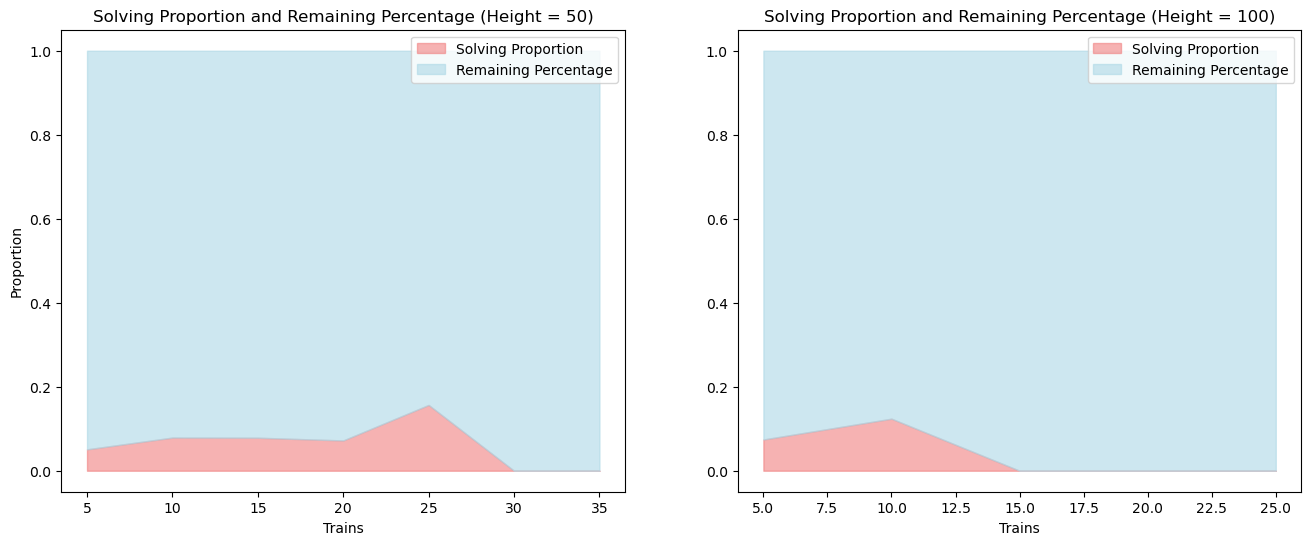

In [40]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only entries where "Encoding" = "encodings/multiple/grid/" and height = 50
grid_df_50 = df[df["Encoding"] == "encodings/multiple/grid/"][df['Height'] == 50]

# Filter the DataFrame to include only entries where "Encoding" = "encodings/multiple/grid/" and height = 100
grid_df_100 = df[df["Encoding"] == "encodings/multiple/grid/"][df['Height'] == 100]

# Create a figure with two subplots side by side (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for height = 50 on the left subplot
trains_50 = grid_df_50["Trains"]
solving_proportion_50 = grid_df_50["Solving Proportion"]
remaining_percentage_50 = 1 - solving_proportion_50

axs[0].fill_between(trains_50, solving_proportion_50, color='lightcoral', alpha=0.6, label='Solving Proportion')
axs[0].fill_between(trains_50, solving_proportion_50, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')
axs[0].set_xlabel('Trains')
axs[0].set_ylabel('Proportion')
axs[0].set_title('Solving Proportion and Remaining Percentage (Height = 50)')
axs[0].legend()

# Plot for height = 100 on the right subplot
trains_100 = grid_df_100["Trains"]
solving_proportion_100 = grid_df_100["Solving Proportion"]
remaining_percentage_100 = 1 - solving_proportion_100

axs[1].fill_between(trains_100, solving_proportion_100, color='lightcoral', alpha=0.6, label='Solving Proportion')
axs[1].fill_between(trains_100, solving_proportion_100, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')
axs[1].set_xlabel('Trains')
axs[1].set_title('Solving Proportion and Remaining Percentage (Height = 100)')
axs[1].legend()

# Show the plots
plt.show()

/tmp/ipykernel_62737/1577560198.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weighted_df_50 = df[df["Encoding"] == "encodings/multiple/weighted/"][df['Height'] == 50]
/tmp/ipykernel_62737/1577560198.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weighted_df_100 = df[df["Encoding"] == "encodings/multiple/weighted/"][df['Height'] == 100]


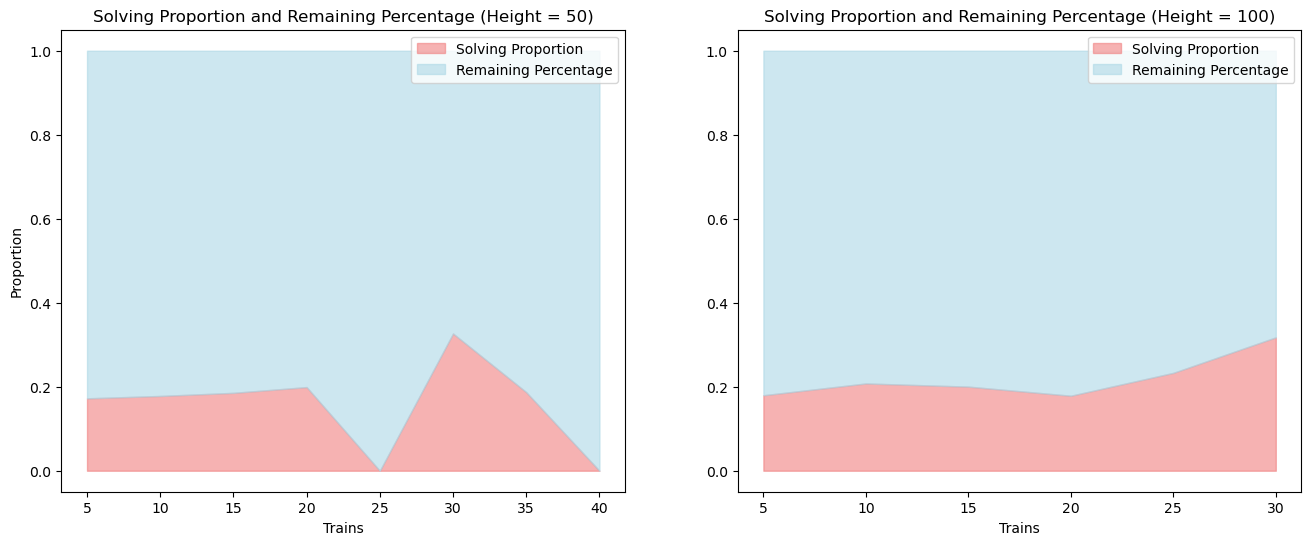

In [41]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only entries where "Encoding" = "encodings/multiple/weighted/" and height = 50
weighted_df_50 = df[df["Encoding"] == "encodings/multiple/weighted/"][df['Height'] == 50]

# Filter the DataFrame to include only entries where "Encoding" = "encodings/multiple/weighted/" and height = 100
weighted_df_100 = df[df["Encoding"] == "encodings/multiple/weighted/"][df['Height'] == 100]

# Create a figure with two subplots side by side (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for height = 50 on the left subplot
trains_50 = weighted_df_50["Trains"]
solving_proportion_50 = weighted_df_50["Solving Proportion"]
remaining_percentage_50 = 1 - solving_proportion_50

axs[0].fill_between(trains_50, solving_proportion_50, color='lightcoral', alpha=0.6, label='Solving Proportion')
axs[0].fill_between(trains_50, solving_proportion_50, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')
axs[0].set_xlabel('Trains')
axs[0].set_ylabel('Proportion')
axs[0].set_title('Solving Proportion and Remaining Percentage (Height = 50)')
axs[0].legend()

# Plot for height = 100 on the right subplot
trains_100 = weighted_df_100["Trains"]
solving_proportion_100 = weighted_df_100["Solving Proportion"]
remaining_percentage_100 = 1 - solving_proportion_100

axs[1].fill_between(trains_100, solving_proportion_100, color='lightcoral', alpha=0.6, label='Solving Proportion')
axs[1].fill_between(trains_100, solving_proportion_100, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')
axs[1].set_xlabel('Trains')
axs[1].set_title('Solving Proportion and Remaining Percentage (Height = 100)')
axs[1].legend()

# Show the plots
plt.show()

/tmp/ipykernel_62737/850136126.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ordered_pipe_df_50 = df[df["Encoding"] == "encodings/multiple/ordered_pipe/"][df['Height'] == 50]
/tmp/ipykernel_62737/850136126.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ordered_pipe_df_100 = df[df["Encoding"] == "encodings/multiple/ordered_pipe/"][df['Height'] == 100]


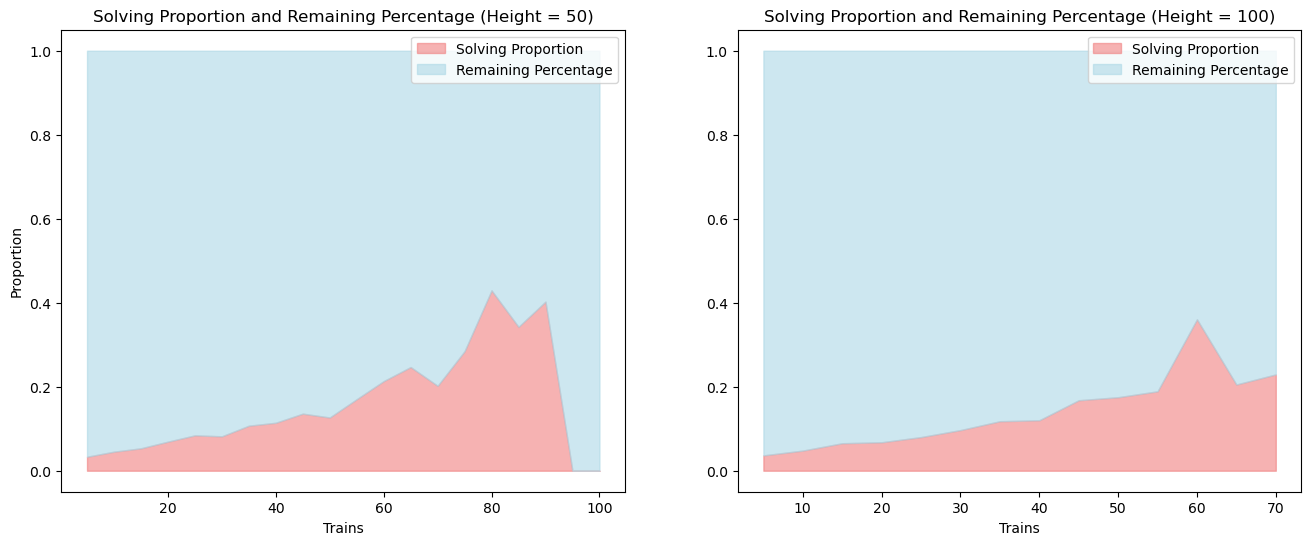

In [43]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only entries where "Encoding" = "encodings/multiple/ordered_pipe/" and height = 50
ordered_pipe_df_50 = df[df["Encoding"] == "encodings/multiple/ordered_pipe/"][df['Height'] == 50]

# Filter the DataFrame to include only entries where "Encoding" = "encodings/multiple/ordered_pipe/" and height = 100
ordered_pipe_df_100 = df[df["Encoding"] == "encodings/multiple/ordered_pipe/"][df['Height'] == 100]

# Create a figure with two subplots side by side (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for height = 50 on the left subplot
trains_50 = ordered_pipe_df_50["Trains"]
solving_proportion_50 = ordered_pipe_df_50["Solving Proportion"]
remaining_percentage_50 = 1 - solving_proportion_50

axs[0].fill_between(trains_50, solving_proportion_50, color='lightcoral', alpha=0.6, label='Solving Proportion')
axs[0].fill_between(trains_50, solving_proportion_50, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')
axs[0].set_xlabel('Trains')
axs[0].set_ylabel('Proportion')
axs[0].set_title('Solving Proportion and Remaining Percentage (Height = 50)')
axs[0].legend()

# Plot for height = 100 on the right subplot
trains_100 = ordered_pipe_df_100["Trains"]
solving_proportion_100 = ordered_pipe_df_100["Solving Proportion"]
remaining_percentage_100 = 1 - solving_proportion_100

axs[1].fill_between(trains_100, solving_proportion_100, color='lightcoral', alpha=0.6, label='Solving Proportion')
axs[1].fill_between(trains_100, solving_proportion_100, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')
axs[1].set_xlabel('Trains')
axs[1].set_title('Solving Proportion and Remaining Percentage (Height = 100)')
axs[1].legend()

# Show the plots
plt.show()